### Facebook製時系列予測「Prophet」で株価を予測してみました【Python】
@see https://optrip.xyz/?p=2755
### Prophet(Python)で株価の予測結果はどれくらい当たっているのか見てみた【バックテスト】
@see https://optrip.xyz/?p=2883
### Prophetで生成した株価モデルの精度を確認する【Pythonで時系列予測】
@see https://optrip.xyz/?p=2833

In [1]:
!pip install ipywidgets --user

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas_datareader.data as web
import datetime

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

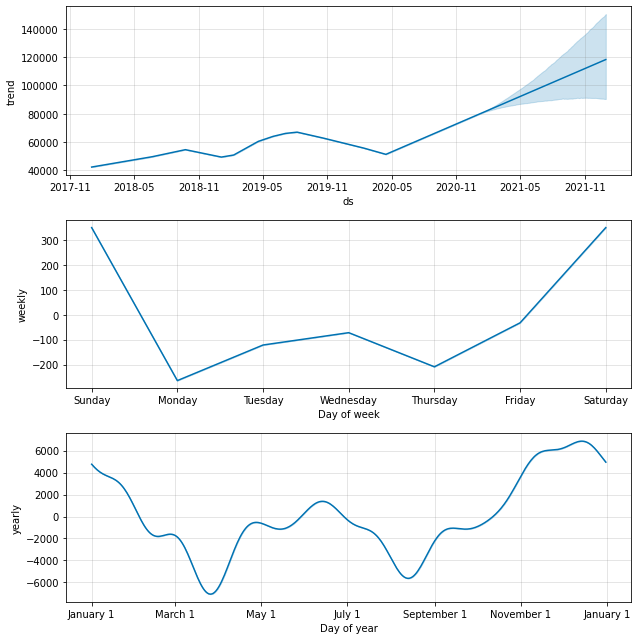

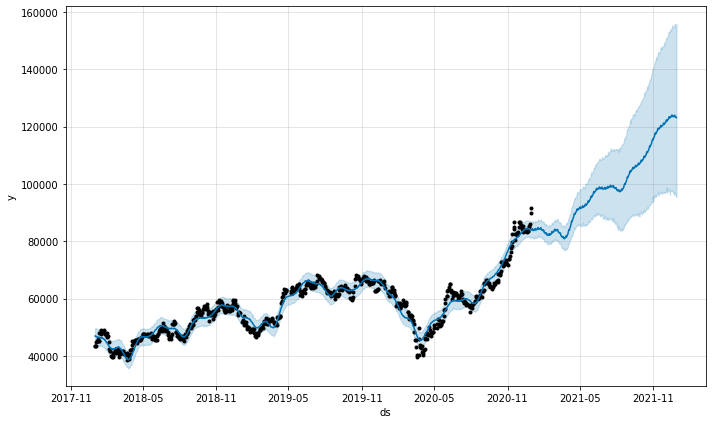

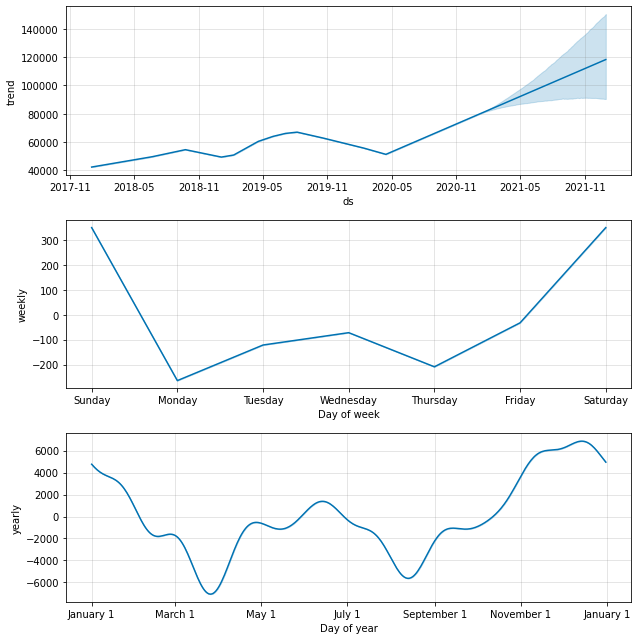

In [3]:
start = datetime.date(2018, 1, 1)
end = datetime.date(2021, 1, 1)

data = web.DataReader('9983.T', 'yahoo', start, end)

data['ds'] = data.index
data = data.rename({'Adj Close':'y'}, axis=1)

model = Prophet()
model.fit(data)

future_data = model.make_future_dataframe(periods=365, freq='d')

forecast_data = model.predict(future_data)

fig = model.plot(forecast_data)
model.plot_components(forecast_data)

In [4]:
pd.set_option('display.max_columns', 100) #DataFarameを省略しない

In [5]:
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1109 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.8 KB


In [6]:
future_data.head(10)

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
5,2018-01-08
6,2018-01-09
7,2018-01-10
8,2018-01-11
9,2018-01-12


In [7]:
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1109 non-null   datetime64[ns]
 1   trend                       1109 non-null   float64       
 2   yhat_lower                  1109 non-null   float64       
 3   yhat_upper                  1109 non-null   float64       
 4   trend_lower                 1109 non-null   float64       
 5   trend_upper                 1109 non-null   float64       
 6   additive_terms              1109 non-null   float64       
 7   additive_terms_lower        1109 non-null   float64       
 8   additive_terms_upper        1109 non-null   float64       
 9   weekly                      1109 non-null   float64       
 10  weekly_lower                1109 non-null   float64       
 11  weekly_upper                1109 non-null   float64     

In [8]:
forecast_data.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,42376.837037,44168.683636,49607.249487,42376.837037,42376.837037,4534.259853,4534.259853,4534.259853,-264.182845,-264.182845,-264.182845,4798.442698,4798.442698,4798.442698,0.0,0.0,0.0,46911.096890
1,2018-01-02,42418.805013,44194.837795,49711.509404,42418.805013,42418.805013,4529.203618,4529.203618,4529.203618,-121.454318,-121.454318,-121.454318,4650.657936,4650.657936,4650.657936,0.0,0.0,0.0,46948.008631
2,2018-01-03,42460.772989,44176.429448,49694.070549,42460.772989,42460.772989,4439.745691,4439.745691,4439.745691,-71.966817,-71.966817,-71.966817,4511.712508,4511.712508,4511.712508,0.0,0.0,0.0,46900.518681
3,2018-01-04,42502.740966,44033.958045,49467.452525,42502.740966,42502.740966,4173.827346,4173.827346,4173.827346,-208.833965,-208.833965,-208.833965,4382.661312,4382.661312,4382.661312,0.0,0.0,0.0,46676.568312
4,2018-01-05,42544.708942,44095.119242,49585.390925,42544.708942,42544.708942,4231.803181,4231.803181,4231.803181,-32.391543,-32.391543,-32.391543,4264.194724,4264.194724,4264.194724,0.0,0.0,0.0,46776.512123
5,2018-01-08,42670.612870,43631.664841,49125.236849,42670.612870,42670.612870,3709.159551,3709.159551,3709.159551,-264.182845,-264.182845,-264.182845,3973.342396,3973.342396,3973.342396,0.0,0.0,0.0,46379.772422
6,2018-01-09,42712.580847,43857.045184,49286.390096,42712.580847,42712.580847,3774.816979,3774.816979,3774.816979,-121.454318,-121.454318,-121.454318,3896.271297,3896.271297,3896.271297,0.0,0.0,0.0,46487.397826
7,2018-01-10,42754.548823,43697.989786,49395.617050,42754.548823,42754.548823,3755.403120,3755.403120,3755.403120,-71.966817,-71.966817,-71.966817,3827.369937,3827.369937,3827.369937,0.0,0.0,0.0,46509.951943
8,2018-01-11,42796.516799,43432.069053,49288.508140,42796.516799,42796.516799,3556.226046,3556.226046,3556.226046,-208.833965,-208.833965,-208.833965,3765.060011,3765.060011,3765.060011,0.0,0.0,0.0,46352.742845
9,2018-01-12,42838.484775,43773.312070,49281.276294,42838.484775,42838.484775,3675.083698,3675.083698,3675.083698,-32.391543,-32.391543,-32.391543,3707.475241,3707.475241,3707.475241,0.0,0.0,0.0,46513.568473


In [9]:
#改めて現在までのデータを取得
#end = datetime.date.today()
end = datetime.date(2022, 1, 1)
data2 = web.DataReader('9983.T', 'yahoo', start, end) #データの取得

In [10]:
#Prophetのためにデータを加工
data2['ds'] = data2.index
data2 = data2.rename({'Adj Close':'y'}, axis=1)

In [11]:
#モデルの生成
model2 = Prophet()
model2.fit(data2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


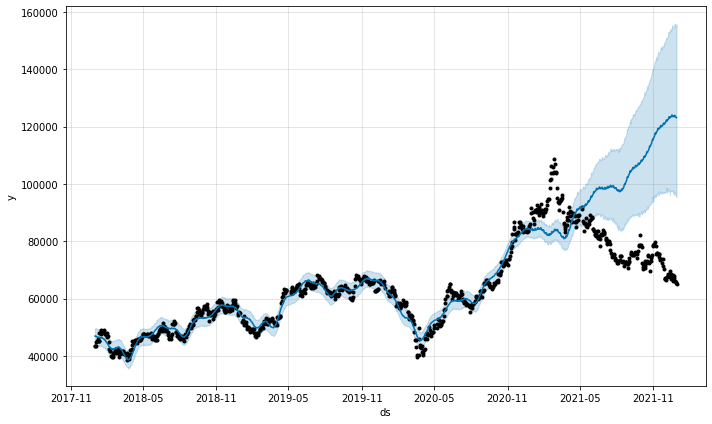

In [12]:
#株価データと予測のプロット
fig = model2.plot(forecast_data)

INFO:prophet:Making 3 forecasts with cutoffs between 2020-01-05 00:00:00 and 2020-12-30 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-pa

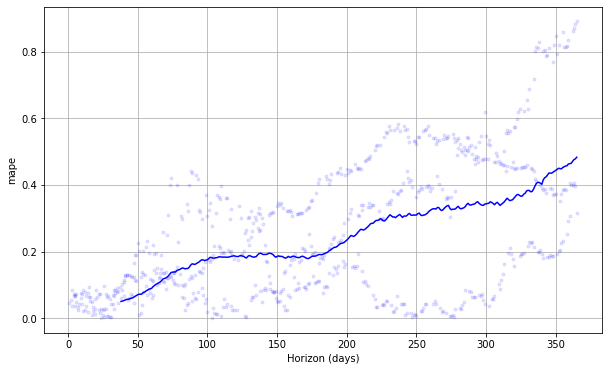

In [13]:
#交差検証
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model2, initial='730 days', period='180 days', horizon='365 days')

#評価値計算
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

#評価値描画
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')